[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/famma-bench/bench-script/blob/main/notebooks/FAMMA_1_dataset_inspection.ipynb)

# Introduction

In this notebook, we illustrate how to generate answers for questions in FAMMA.

Before running generation, we have to things to prepare
- install the FAMMA benchmark script
- setup a LLM web API or a locally hosted LLM.

## Install the benchmark script

Firstly let's download and install the script

In [ ]:
! rm -rf bench-script
! git clone https://github.com/famma-bench/bench-script.git
! pip install -r bench-script/requirements.txt
! cd bench-script && pip install -e .

Then, we can download the dataset by running the following script.

In [ ]:
from famma_runner.utils.data_utils import download_data

# the directory of the dataset in huggingface
hf_dir = "weaverbirdllm/famma"

# the version of the dataset, there are two versions: release_basic and release_livepro
# if None, it will download the whole dataset
split = "release_basic"

# the local directory to save the dataset
save_dir = "./data"

# whether to download the dataset from huggingface or local, by default it is False
from_local = False

success = download_data(
        hf_dir=hf_dir,
        split=split,
        save_dir=save_dir,
        from_local=from_local
    )



After downloading, the dataset will be saved in the local directory `./data` in json format.  

# Dataset Inspection

## Dataset Statistics

We use the following script to show the overall statistics of the dataset.

In [26]:
from famma_runner.utils.descriptive_utils import get_dataset_statistics

stat_dict = get_dataset_statistics('data/release_basic.json')


In [27]:
stat_dict.keys()

dict_keys(['total_count', 'total_main_question_count', 'unique_main_question_ids', 'language_count', 'question_type_count', 'image_type_count', 'image_type_set', 'subfield_count', 'subfield_set', 'topic_difficulty_count', 'explanation_count', 'multiple_images_count', 'arithmetic_count', 'arithmetic_by_language', 'arithmetic_by_difficulty', 'token_counts', 'subfield_difficulty_count', 'total_token_sum', 'language_difficulty_count', 'question_type_difficulty_count'])

In [28]:
'Total questions {}'.format(stat_dict['total_count'])

'Total questions 1945'

In [29]:
'Language distribution /n'
stat_dict['language_count']

defaultdict(int, {'english': 1378, 'chinese': 411, 'french': 156})

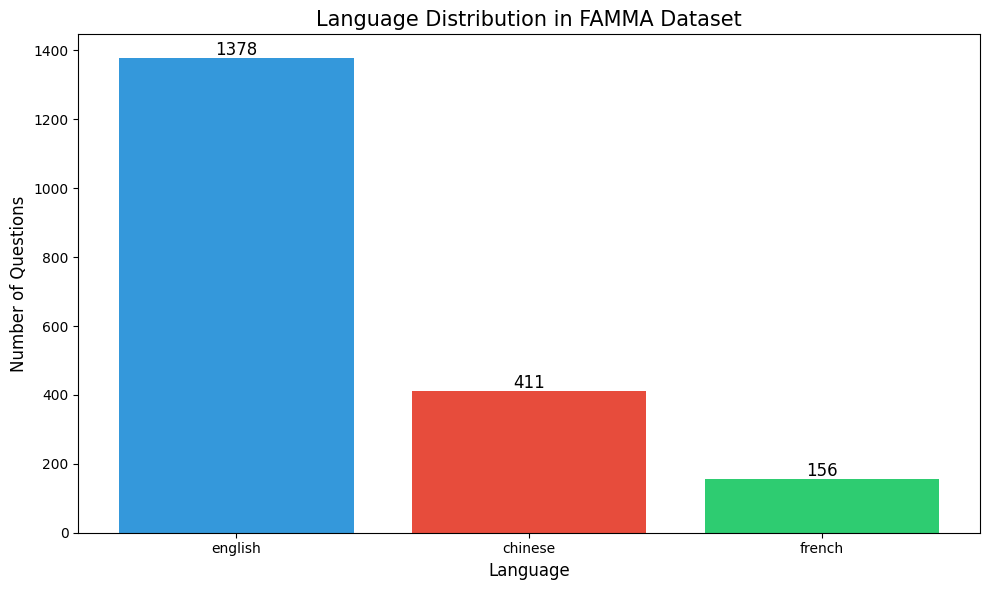

In [30]:
import matplotlib.pyplot as plt

# Create a bar plot for language distribution
plt.figure(figsize=(10, 6))
languages = list(stat_dict['language_count'].keys())
counts = list(stat_dict['language_count'].values())

plt.bar(languages, counts, color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Language Distribution in FAMMA Dataset', fontsize=15)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
'Difficulty distribution /n'
stat_dict['topic_difficulty_count']

defaultdict(int, {'easy': 694, 'medium': 473, 'hard': 778})

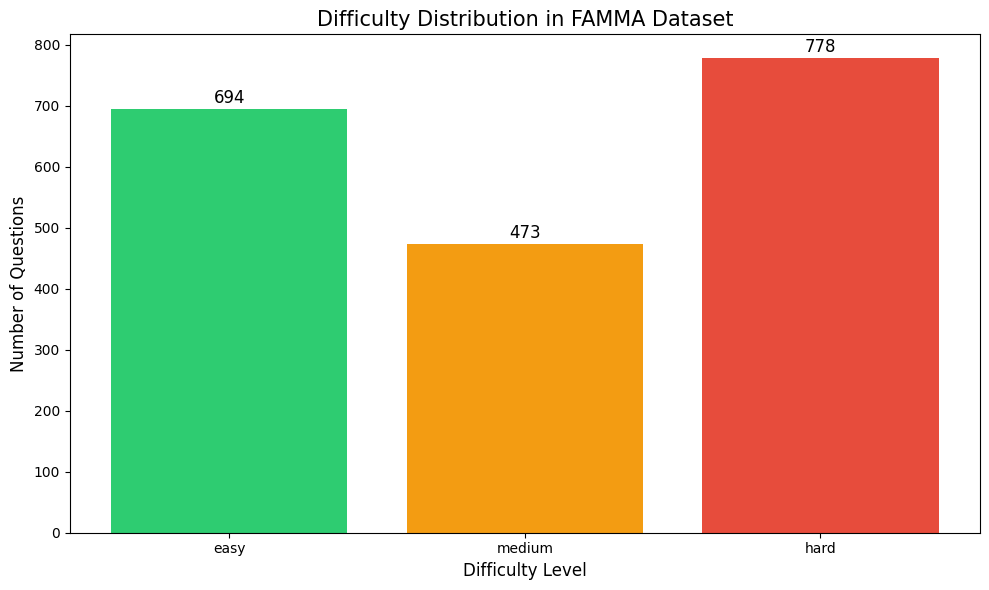

In [32]:
import matplotlib.pyplot as plt

# Create a bar plot for difficulty distribution
plt.figure(figsize=(10, 6))
difficulties = list(stat_dict['topic_difficulty_count'].keys())
counts = list(stat_dict['topic_difficulty_count'].values())

# Use a different color palette for difficulty levels
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green for easy, orange for medium, red for hard
plt.bar(difficulties, counts, color=colors)

plt.title('Difficulty Distribution in FAMMA Dataset', fontsize=15)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [33]:
'Question type distribution /n'
stat_dict['question_type_count']

defaultdict(int, {'multiple-choice': 1057, 'open question': 888})

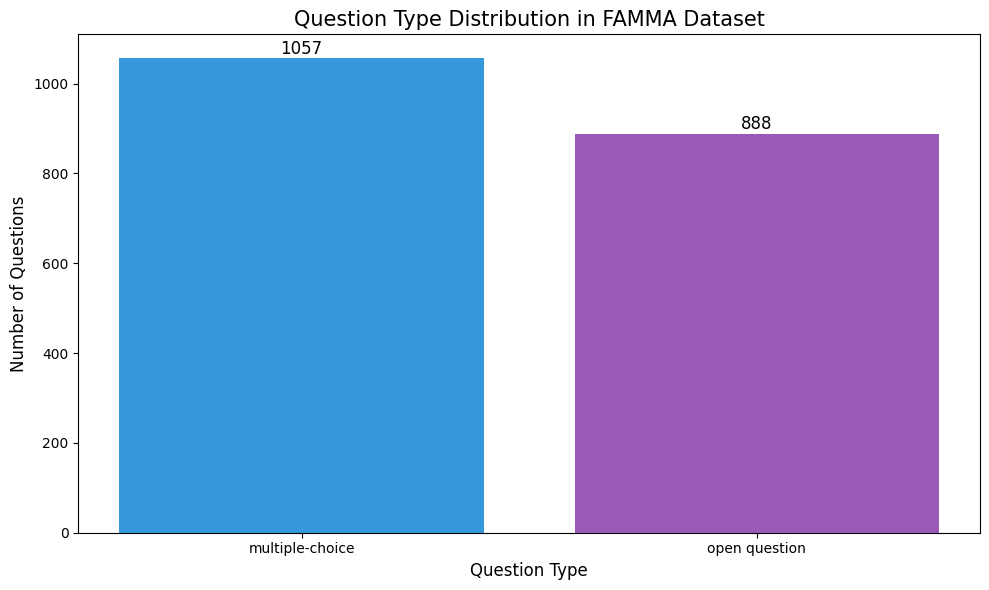

In [34]:
import matplotlib.pyplot as plt

# Create a bar plot for question type distribution
plt.figure(figsize=(10, 6))
question_types = list(stat_dict['question_type_count'].keys())
counts = list(stat_dict['question_type_count'].values())

# Use a different color palette for question types
colors = ['#3498db', '#9b59b6']  # Blue for multiple-choice, purple for open question
plt.bar(question_types, counts, color=colors)

plt.title('Question Type Distribution in FAMMA Dataset', fontsize=15)
plt.xlabel('Question Type', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [35]:
'Subfield distribution /n'
stat_dict['subfield_count']

defaultdict(int,
            {'fixed income': 264,
             'equity': 278,
             'portfolio management': 602,
             'financial statement analysis': 100,
             'derivatives': 296,
             'economics': 44,
             'alternative investments': 92,
             'corporate finance': 269})

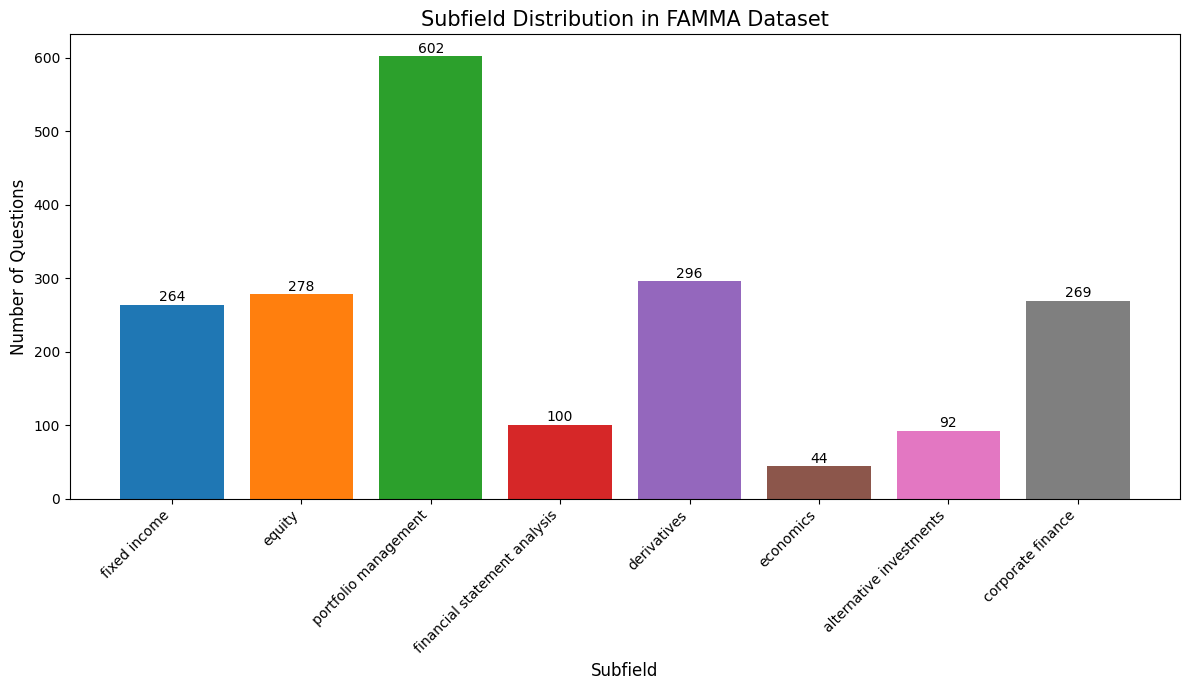

In [36]:
import matplotlib.pyplot as plt

# Create a bar plot for subfield distribution
plt.figure(figsize=(12, 7))
subfields = list(stat_dict['subfield_count'].keys())
counts = list(stat_dict['subfield_count'].values())

# Use a colorful palette for different subfields
colors = plt.cm.tab10(range(len(subfields)))
plt.bar(subfields, counts, color=colors)

plt.title('Subfield Distribution in FAMMA Dataset', fontsize=15)
plt.xlabel('Subfield', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



## Question Viewer

The following section provides a question viewer that allows us to examine the detailed content of any question in the FAMMA dataset by specifying its unique question ID. This helps us understand the structure and content of individual questions, including their context, images, and answer information.

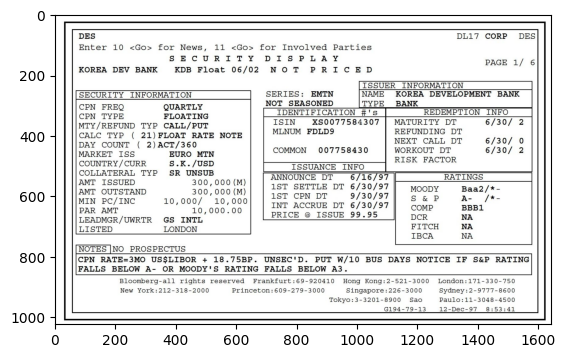

context: Below image is a sceenshot of the Contract specifications for a puttable floating rate note issued by the Korea Development from Bloomberg. <image_1>
Bank.
question: What is the coupon feature of the Korea Development Bank security as seen in the screenshot?
options: ['A. Fixed', 'B. Floating', 'C. Zero', 'D. Variable']
answers: B
explanation: nan


In [53]:
from PIL import Image

data_dir = 'data/release_basic.json'
language = 'english'
main_question_id = '1'

from easyllm_kit.utils import read_json

def get_all_subquestions_given_main_question_id(data_dir, main_question_id, language):
    data_dict = read_json(data_dir)
    res = []

    for item in data_dict:
        if item['main_question_id'] == main_question_id and item['language'] == language:
            res.append(item)

        return res

def display_subquestions(subquestions):
    # need to find and display the image from the first subquestion
    # do a loop since there might be multiple images
    for i in range(1, 8):
        image_path = subquestions[0]['image_{}'.format(i)]
        if image_path != 'None' and image_path is not None:
            image_path = f'data/{image_path}'
            image = Image.open(image_path)
            plt.imshow(image)
            plt.show()

    # display the context
    print(f'context: {subquestions[0]["context"]}')

    # display the question and the options
    for subquestion in subquestions:
        print(f"question: {subquestion['question']}")
        print(f"options: {subquestion['options']}")
        print(f"answers: {subquestion['answers']}")
        print(f"explanation: {subquestion['explanation']}")

subquestions = get_all_subquestions_given_main_question_id(data_dir, main_question_id, language)
display_subquestions(subquestions)
